# Imports

In [1]:
import sys
 
# setting path
sys.path.append('..')

In [2]:
from model_builder import ModelBuilder
import matplotlib.pyplot as plt

2022-11-22 10:09:24.097136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model

Initialize the model builder

In [3]:
model_builder = ModelBuilder()

# Create Dataset

Create the dataset for the training from the csv files that contains all the samples 

In [4]:
# Response variable is the deforestation risk value
response_variable=['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']

# Predictors names that we want to use for the training
feature_names = ['elevation', 'slope', 'south_america_rivers', 'brazil_roads', 'urban_distance', 'brazil_protected_areas', 
                 'brazil_surrounding_forest', 'brazil_pasture', 'brazil_agriculture', 'population_density']
# feature_names = ['brazil_pasture', 'population_density']

gcp_bucket = 'eartshot-science-team'
gcp_folder_name = 'deforestation_risk'
samples_folder_name = f'Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints'
name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_10km_buffer.csv'

# samples_folder_name = f'deforestationRisk_MA_samples'
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/deforestationRisk_MA_renamed2.csv'

Create the dataset with train, test and val splits

In [5]:
model_builder.train_val_test_split(response_variable=response_variable, 
                             samples_csv_local=True,
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = True,
                             name_test_buffer_column='test_set_5km_buffer', 
                             name_val_buffer_column='val_set_5km_buffer', 
                             name_test_no_buffer_column='test_set_no_buffer', 
                             name_val_no_buffer_column='val_set_no_buffer'
                            )

Reading sample csv file: /Users/margauxmforstyhe/Desktop/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_10km_buffer.csv...
We have 2049422 samples
Training samples: 1639537
Test samples: 409885
Validation samples: 0


Let's take a look at our training predictors:

In [6]:
model_builder.X_train.head()

,elevation,slope,south_america_rivers,brazil_roads,urban_distance,brazil_protected_areas,brazil_surrounding_forest,brazil_pasture,brazil_agriculture,population_density
1617240,670,16,250.860492,1239.505049,10703.754817,26388.451615,526,8,0,3.117317
1155553,39,2,2002.840492,1597.078954,853.127252,21092.296849,479,441,11,126.717690
570840,462,26,632.313385,1445.808277,4278.697005,12722.535880,629,332,0,1.794971
1850633,840,11,274.103674,672.054890,9325.148967,4844.356131,719,229,0,5.920970
984828,443,7,233.662019,1877.267042,1725.140302,26943.987039,0,93,308,4.921607


Now our training targets:

In [7]:
model_builder.y_train.head(2)

,Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested
1617240,1
1155553,0


In [8]:
nb_forest_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in training set')

nb_forest_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in validation set')

nb_forest_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples_test} forest samples and {nb_deforested_samples_test} deforested samples in test set')


There are 1400121 forest samples and 239416 deforested samples in training set
There are 349557 forest samples and 60328 deforested samples in test set


In [9]:
# Training Predictors samples 
model_builder.X_train.shape

(1639537, 10)

In [10]:
# Training Response samples 
model_builder.y_train.shape

(1639537, 1)

In [11]:
# Test Predictors samples 
model_builder.X_test.shape

(409885, 10)

In [12]:
# Test Response samples 
model_builder.y_test.shape

(409885, 1)

In [13]:
model_builder.feature_names

['elevation',
 'slope',
 'south_america_rivers',
 'brazil_roads',
 'urban_distance',
 'brazil_protected_areas',
 'brazil_surrounding_forest',
 'brazil_pasture',
 'brazil_agriculture',
 'population_density']

In [14]:
model_builder.response_variable

['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']

# Hyperparameters tuning

Finding best hyperparameters with GridSearch: Takes a very long time!

In [15]:
# # Uses val set 
# best_params = model_builder.grid_search(n_estimators=[100, 200, 500], 
#                                         max_features=['sqrt', 'log2'], 
#                                         max_depth=[4,5,6,7,8], 
#                                         criterion=['squared_error', 'absolute_error'], 
#                                         random_state=42)

In [16]:
# best_params

# Training

In [17]:
model_builder.initialize_regression_model(nb_trees=100, max_depth=5, random_state=42, max_features='sqrt', n_cores=-1, 
                               oob_score=True, bootstrap=True, criterion='squared_error')

In [18]:
model_builder.model

RandomForestRegressor(max_depth=5, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42, verbose=1)

In [19]:
model_builder.train()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.7s finished


# Evaluation

In [20]:
# # On validation set
# y_pred_val, mae_val, mse_val, rmse_val, oob_score_val, r2_val, feature_imp_val = model_builder.evaluate(X_test=model_builder.X_val,
#                                                                     y_test=model_builder.y_val,
#                                                                     save_figures=False, saving_base_output_name='testing_val_set')


Evaluation...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished





Mean Absolute Error (MAE): 0.24617831981668095
Mean Squared Error (MSE): 0.12287568898599387
Root Mean Squared Error (RMSE): 0.350536287687871
R2: 0.02106673730528341
OOB prediction of accuracy is: 2.0947065569000056%



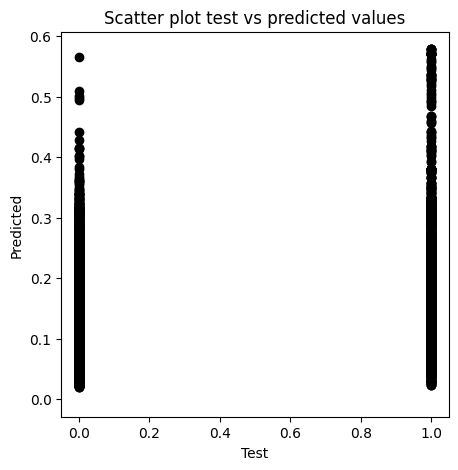

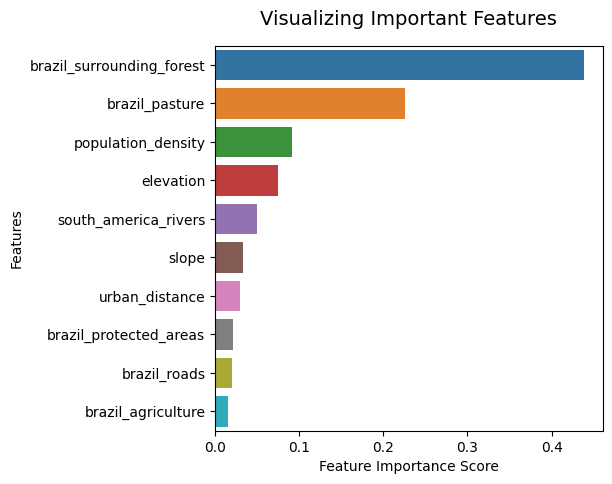

In [21]:
# On test set
y_pred_test, mae_test, mse_test, rmse_test, oob_score_test, r2_test, feature_imp_test = model_builder.evaluate(X_test=model_builder.X_test,
                                                                    y_test=model_builder.y_test,
                                                                    save_figures=False, saving_base_output_name='testing_test_set')

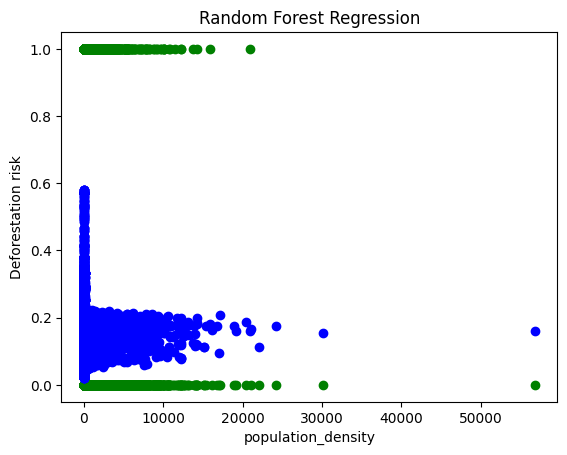

In [22]:
predictor = 'population_density'
plt.scatter(model_builder.X_test[predictor].values, model_builder.y_test, color = 'green')
plt.scatter(model_builder.X_test[predictor].values, y_pred_test, color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel(predictor)
plt.ylabel('Deforestation risk')
plt.show()

# Inference on tiles

In [23]:
model_builder.inference(mask_band='brazil_pasture', 
                        tiles_folder_name='Brazil_Deforestation_Risk_inference_200km2_grid_scale30', 
                        tiles_in_GCP=False,   # Running locally
                        RF_output_folder_temp='TEST_RF_outputs_temp',
                        path_to_tiles_local='/Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_200km2_grid_scale30'
                       )
